In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
matches=pd.read_csv('matches.csv')
deliveries=pd.read_csv('deliveries.csv')
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
matches.shape,deliveries.shape

((756, 18), (179078, 21))

In [5]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

**in deliveries column im grouping my data with respect to match id and inning and im summing it with respect to the total runs  and the runs are ball by ball and i want to sum those runs according to inning wise ,and every match has a particular match id and every match will have two inning**

**we are summing the ball by ball run inning wise**

In [6]:
deliveries.groupby(['match_id','inning']).sum()

over  ball  is_super_over  wide_runs  bye_runs  legbye_runs  \
match_id inning                                                                
1        1       1312   456              0          5         0            1   
         2       1259   444              0          4         0            1   
2        1       1323   455              0          6         1            1   
         2       1270   435              0          3         0            1   
3        1       1280   434              0          2         0            2   
...               ...   ...            ...        ...       ...          ...   
11413    2       1301   448              0          4         1            0   
11414    1       1294   441              0          2         0            5   
         2       1160   413              0          6         0            5   
11415    1       1287   447              0          3         0            0   
         2       1295   448              0          4         5            0   

                 noball_runs  penalty_runs  batsman_runs  extra_runs  \
match_id inning                                                        
1        1                 1             0           200           7   
         2                 1             0           166           6   
2        1                 0             0           176           8   
         2                 0             0           183           4   
3        1                 0             0           179           4   
...                      ...           ...           ...         ...   
11413    2                 0             0           165           5   
11414    1                 1             0           147           8   
         2                 0             0           151          11   
11415    1                 0             0           149           3   
         2                 0             0           148           9   

                 total_runs  
match_id inning              
1        1              207  
         2              172  
2        1              184  
         2              187  
3        1              183  
...                     ...  
11413    2              170  
11414    1              155  
         2              162  
11415    1              152  
         2              157  

[1528 rows x 11 columns]

In [7]:
deliveries.groupby(['match_id','inning']).sum()['total_runs']

match_id  inning
1         1         207
          2         172
2         1         184
          2         187
3         1         183
                   ... 
11413     2         170
11414     1         155
          2         162
11415     1         152
          2         157
Name: total_runs, Length: 1528, dtype: int64

In [8]:
#grouping the 1st innings,2nd innings score in a particular matchid
#lets say match id=1, so inning 1 score=207,inning 2 score=172, in that way

totalrun_df=deliveries.groupby(['match_id','inning']).sum()['total_runs'].reset_index()
totalrun_df
#reset.index will convert series into a dataframe

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
...,...,...,...
1523,11413,2,170
1524,11414,1,155
1525,11414,2,162
1526,11415,1,152


In [9]:
#capturing only the first innings,as we will be predicting for the second innings
totalrun_df=totalrun_df[totalrun_df['inning']==1]  #whereever the inning is one im capturing that 
totalrun_df['total_runs']=totalrun_df['total_runs'].apply(lambda x:x+1) #target will always be scored run by first team plus 1
totalrun_df

C:\Users\JAYANT~1\AppData\Local\Temp/ipykernel_23104/306566998.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totalrun_df['total_runs']=totalrun_df['total_runs'].apply(lambda x:x+1) #target will always be scored run by first team plus 1


,match_id,inning,total_runs
0,1,1,208
2,2,1,185
4,3,1,184
6,4,1,164
8,5,1,158
...,...,...,...
1518,11347,1,144
1520,11412,1,137
1522,11413,1,172
1524,11414,1,156


In [10]:
matches.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [11]:
'''
Merging the total first innings score df with the matches df,
where left side merging is done on "id" column of the matches
and right side merging is done on "match_id" column of the totalrun_df

'''

'''
we want to merge matches and totalrun_df---> similar columns in matches and totalrun_df is id from matches dataframe and match_id from totalrun_df dataframe

'''
match_df = matches.merge(totalrun_df[['match_id','total_runs']],
                       left_on='id',right_on='match_id')

match_df
#in matches dataframe id column is there and in totalrun_df matches_id column is there but they contain same thing
#id in matches dataframe and match_id of totalruns_df dataframe are same only  
#i dont want inning of totalrun_df because inning is 1 only 

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,185
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,184
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,164
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,144
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,137
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,172
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,156


In [12]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [13]:
teams=[
    'Sunrisers Hyderabad', 
    'Mumbai Indians', 
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders', 
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals', 
    'Delhi Capitals'
]
#these teams play frequently

In [14]:
#replacing the delhi daredevils with delhi capitals

match_df['team1']=match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2']=match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

In [15]:
match_df['team1']=match_df['team1'].str.replace('Deccan Charges','Sunrisers Hyderabad')
match_df['team1']=match_df['team2'].str.replace('Deccan Charges','Sunrisers Hyderabad')

In [16]:
#will consider only frequently occuring teams,
#which are mentioned in the teams list

match_df=match_df[match_df['team1'].isin(teams)]
match_df=match_df[match_df['team2'].isin(teams)]
match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Kings XI Punjab', 'Delhi Capitals', 'Sunrisers Hyderabad',
       'Mumbai Indians', 'Rajasthan Royals', 'Chennai Super Kings'],
      dtype=object)

In [17]:
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Royal Challengers Bangalore,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208
2,3,IPL-2017,Rajkot,07-04-2017,Kolkata Knight Riders,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,184
3,4,IPL-2017,Indore,08-04-2017,Kings XI Punjab,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,164
4,5,IPL-2017,Bangalore,08-04-2017,Delhi Capitals,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,158
5,6,IPL-2017,Hyderabad,09-04-2017,Sunrisers Hyderabad,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN,6,136


In [18]:
match_df.shape

(660, 20)

In [19]:
#checking the matches which resulted in dl method

match_df[match_df['dl_applied']==1].style.background_gradient(cmap='plasma')

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
56,57,IPL-2017,Bangalore,17-05-2017,Kolkata Knight Riders,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,0,7,NM Coulter-Nile,M Chinnaswamy Stadium,AK Chaudhary,Nitin Menon,nan,57,129
99,100,IPL-2008,Delhi,17-05-2008,Kings XI Punjab,Kings XI Punjab,Delhi Daredevils,bat,normal,1,Kings XI Punjab,6,0,DPMD Jayawardene,Feroz Shah Kotla,AV Jayaprakash,RE Koertzen,nan,100,119
102,103,IPL-2008,Kolkata,18-05-2008,Chennai Super Kings,Chennai Super Kings,Kolkata Knight Riders,bat,normal,1,Chennai Super Kings,3,0,M Ntini,Eden Gardens,Asad Rauf,K Hariharan,nan,103,150
119,120,IPL-2009,Cape Town,19-04-2009,Delhi Capitals,Delhi Capitals,Delhi Daredevils,field,normal,1,Delhi Daredevils,0,10,DL Vettori,Newlands,MR Benson,SD Ranade,nan,120,105
122,123,IPL-2009,Durban,21-04-2009,Kolkata Knight Riders,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,11,0,CH Gayle,Kingsmead,DJ Harper,SD Ranade,nan,123,159
148,149,IPL-2009,Centurion,07-05-2009,Kings XI Punjab,Kings XI Punjab,Chennai Super Kings,bat,normal,1,Chennai Super Kings,12,0,ML Hayden,SuperSport Park,DJ Harper,TH Wijewardene,nan,149,186
280,281,IPL-2011,Kolkata,07-05-2011,Kolkata Knight Riders,Kolkata Knight Riders,Chennai Super Kings,bat,normal,1,Kolkata Knight Riders,10,0,Iqbal Abdulla,Eden Gardens,Asad Rauf,PR Reiffel,nan,281,115
290,291,IPL-2011,Bangalore,14-05-2011,Royal Challengers Bangalore,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,1,Royal Challengers Bangalore,0,4,CH Gayle,M Chinnaswamy Stadium,RE Koertzen,RB Tiffin,nan,291,90
488,489,IPL-2014,Delhi,10-05-2014,Sunrisers Hyderabad,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,1,Sunrisers Hyderabad,0,8,DW Steyn,Feroz Shah Kotla,RM Deshpande,BNJ Oxenford,nan,489,144
536,537,IPL-2015,Visakhapatnam,22-04-2015,Kolkata Knight Riders,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Sunrisers Hyderabad,16,0,DA Warner,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,RK Illingworth,VA Kulkarni,nan,537,177


In [20]:
#ignoring the rows which were DL method

match_df=match_df[match_df['dl_applied']==0]   # this will give me the record of all the matches completely played

#considering the match_id,city, winner and total runs

match_df=match_df[['match_id','city','winner','total_runs']]

match_df
#now match_df is completely processed
#match_df is already a dataframe of first inning
#the total_runs here are runs of first inning only 

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,208
2,3,Rajkot,Kolkata Knight Riders,184
3,4,Indore,Kings XI Punjab,164
4,5,Bangalore,Royal Challengers Bangalore,158
5,6,Hyderabad,Sunrisers Hyderabad,136
...,...,...,...,...
751,11347,Mumbai,Mumbai Indians,144
752,11412,Chennai,Mumbai Indians,137
753,11413,Visakhapatnam,Delhi Capitals,172
754,11414,Visakhapatnam,Chennai Super Kings,156


In [21]:
deliveries.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [22]:
#merging matchdf with delevires on match_id

delivery_df=match_df.merge(deliveries,on='match_id')
#on which dataframe you want to merge will come inside the bracket
delivery_df.head(5)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [23]:
#both match_df dataframe and deliveries dataframe has total_runs
#toatl_runs_x=total_runs of match_df
#total_runs_y=total_runs of deliveries
#the dataframe on which we are merging wiil be considered as y
# x merges with y,every similar column in x, y will have _x and _y attached to them 

In [24]:
delivery_df.columns

Index(['match_id', 'city', 'winner', 'total_runs_x', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs_y',
       'player_dismissed', 'dismissal_kind', 'fielder'],
      dtype='object')

In [25]:
# considering only the 2nd innings

delivery_df=delivery_df[delivery_df['inning']==2]
delivery_df.head()


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN


**total_runs_x has already been computed earlier and stored in total_Run_df which then was merged into match_df and now match_df was merged with deliveries and finally became delivery_df**
total_run_x gives the first inning score 

and in deliver_df if we see the total_run_y which are the runs of 2nd inning we are having ball by ball score

thats why match_df data was less and deliveries dataframe is huge

In [26]:
#total_runs_x are the runs of 1st innings
#now we need to consider 2nd innings because we are trying to predict the probablity of winning or loosing for the 2nd inning   

In [27]:
delivery_df.shape  

(74391, 24)

In [28]:
delivery_df.groupby('match_id').cumsum()
#cumsum()--->cumulative sum


,total_runs_x,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y
125,208,2,1,1,0,0,0,0,0,0,1,0,1
126,416,4,2,3,0,0,0,0,0,0,1,0,1
127,624,6,3,6,0,0,0,0,0,0,1,0,1
128,832,8,4,10,0,0,0,0,0,0,3,0,3
129,1040,10,5,15,0,0,0,0,0,0,7,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153752,18360,240,1215,430,0,4,5,0,0,0,143,9,152
153753,18513,242,1235,433,0,4,5,0,0,0,145,9,154
153754,18666,244,1255,437,0,4,5,0,0,0,146,9,155
153755,18819,246,1275,442,0,4,5,0,0,0,148,9,157


In [29]:
delivery_df.groupby('match_id').cumsum()['total_runs_y']


125         1
126         1
127         1
128         3
129         7
         ... 
153752    152
153753    154
153754    155
153755    157
153756    157
Name: total_runs_y, Length: 74391, dtype: int64

In [30]:
'''
So by observation we can observe that in the matchdf we had taken
firstinnings total runs,right and in the second case,that is in the 
delivery dataframe we considered second inning runs,as our main aim
is to find the probability of either teams to win or loose,we need 
current runs and runrate,so for current runs,we can apply groupby
on matchid and take the cummulative sum wrt total_runs_y,now,basically
totalruns was present in matchdf as well as deliveries_df,but as we merged
both the dataframes,it resulted in total_runs_x,and total_runs_y,
so total_runs_x is the first innings runs and total_runs_y are the second
innings runs,ball by ball,by applying cummulative sum,this becomes 
current score


total_runs_y gives the run scored after each ball,so in the second innings,
we want to get the total second innings runs,so we will groupby match id
and will apply the cummulative sum



'''

# current score of particular match

delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,2,0,2,NaN,NaN,NaN,3
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,4,0,4,NaN,NaN,NaN,7


In [31]:
#runs left

delivery_df['runs_left']=delivery_df['total_runs_x'] - delivery_df['current_score']
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,1,0,1,NaN,NaN,NaN,1,207
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,207
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,207
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,2,0,2,NaN,NaN,NaN,3,205
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,4,0,4,NaN,NaN,NaN,7,201


In [32]:
'''
if one ball is played,then balls left = 120-1 = 119........(1)
if two balls are played,then balls left = 120-2 = 118

so similarly if over=1,over has 6 balls right,so 1*6 = 6
now,ball = 1,so 6+1 = 7,now 126-7 = 119,which is same as (1)

so we'll use balls_left = 126-(over*6+current_ball)

'''

# balls left


delivery_df['balls_left'] = 126-(delivery_df['over']*6+delivery_df['ball'])

delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,207,119
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,118
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,117
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,205,116
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,201,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153752,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,1,4
153753,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-1,3
153754,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-2,2
153755,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-4,1


In [33]:
list(delivery_df['player_dismissed'].unique())

[nan,
 'Mandeep Singh',
 'CH Gayle',
 'KM Jadhav',
 'TM Head',
 'Sachin Baby',
 'STR Binny',
 'SR Watson',
 'S Aravind',
 'TS Mills',
 'YS Chahal',
 'M Vohra',
 'WP Saha',
 'HM Amla',
 'AR Patel',
 'AP Tare',
 'KK Nair',
 'SW Billings',
 'SV Samson',
 'CH Morris',
 'CR Brathwaite',
 'PJ Cummins',
 'RR Pant',
 'S Nadeem',
 'S Dhawan',
 'PA Patel',
 'JC Buttler',
 'RG Sharma',
 'KH Pandya',
 'KA Pollard',
 'N Rana',
 'SP Narine',
 'RV Uthappa',
 'MJ McClenaghan',
 'DA Warner',
 'MC Henriques',
 'DJ Hooda',
 'Yuvraj Singh',
 'BCJ Cutting',
 'EJG Morgan',
 'GJ Maxwell',
 'DA Miller',
 'MM Sharma',
 'KC Cariappa',
 'V Kohli',
 'AB de Villiers',
 'P Negi',
 'S Badree',
 'AF Milne',
 'C de Grandhomme',
 'G Gambhir',
 'YK Pathan',
 'SA Yadav',
 'CR Woakes',
 'I Sharma',
 'AD Mathews',
 'SS Iyer',
 'CJ Anderson',
 'K Rabada',
 'KV Sharma',
 'HH Pandya',
 'MK Pandey',
 'MJ Guptill',
 'SE Marsh',
 'Anureet Singh',
 'Harbhajan Singh',
 'JJ Bumrah',
 'SP Jackson',
 'A Choudhary',
 'KS Williamson',


In [34]:
list(delivery_df['player_dismissed'].unique())[:5]
#nan here means player was not dismissed 
#whereever name is there it means the player was dismissed 

[nan, 'Mandeep Singh', 'CH Gayle', 'KM Jadhav', 'TM Head']

In [35]:
#filling nan values with '0'

delivery_df['player_dismissed']=delivery_df['player_dismissed'].fillna("0")

#now we will convert this player_dismissed col into a boolean col
#if the player is not dismissed then it's 0 else its 1

delivery_df['player_dismissed']=delivery_df['player_dismissed'].apply(lambda x:x if x=="0" else "1")

#delivery_df['player_dismissed'].apply(lambda x:x if x=="0" else "1")
#that is for every element in player_dismissed if the element is 0 then keep it and mark it as 0 or else for any other thing return 1

#converting string to int

delivery_df['player_dismissed']=delivery_df['player_dismissed'].astype('int')

delivery_df['player_dismissed'].unique()


array([0, 1])

In [38]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,0,NaN,NaN,1,207,119
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,1,207,118
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,1,207,117
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,0,NaN,NaN,3,205,116
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,0,NaN,NaN,7,201,115


In [39]:
#wickets fallen

wickets=delivery_df.groupby('match_id').cumsum()['player_dismissed'].values

delivery_df['wickets']=10-wickets

delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,207,119,10
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,118,10
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,117,10
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,205,116,10
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,201,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153752,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,1,0,NaN,NaN,152,1,4,5
153753,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,2,0,NaN,NaN,154,-1,3,5
153754,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,0,1,1,run out,KH Pandya,155,-2,2,4
153755,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,2,0,NaN,NaN,157,-4,1,4


In [40]:
#current run rate

delivery_df['cur_run_rate']=(delivery_df['current_score']*6)/(120-delivery_df['balls_left'])

#required run rate

delivery_df['req_run_rate']=(delivery_df['runs_left']*6)/(delivery_df['balls_left'])

delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,cur_run_rate,req_run_rate
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,207,119,10,6.0,10.436975
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,1,207,118,10,3.0,10.525424
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,1,207,117,10,2.0,10.615385
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,NaN,NaN,3,205,116,10,4.5,10.603448
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,NaN,NaN,7,201,115,10,8.4,10.486957


In [41]:
def resultfun(row):
    
    return 1 if row['batting_team'] == row['winner'] else 0
#if the batting team is winner it will return 1 else it will return 0

In [42]:
delivery_df['result'] = delivery_df.apply(resultfun,axis=1)
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,cur_run_rate,req_run_rate,result
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1,207,119,10,6.0,10.436975,0
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1,207,118,10,3.0,10.525424,0
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,1,207,117,10,2.0,10.615385,0
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,NaN,NaN,3,205,116,10,4.5,10.603448,0
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,NaN,NaN,7,201,115,10,8.4,10.486957,0


<AxesSubplot:xlabel='result', ylabel='count'>

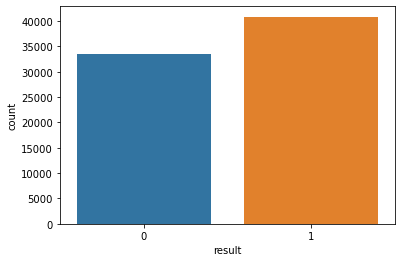

In [45]:
sns.countplot(x=delivery_df['result'])

In [46]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left',
                        'balls_left','wickets','total_runs_x','cur_run_rate',
                        'req_run_rate','result']]

final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,cur_run_rate,req_run_rate,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,119,10,208,6.0,10.436975,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,118,10,208,3.0,10.525424,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,117,10,208,2.0,10.615385,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,205,116,10,208,4.5,10.603448,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,201,115,10,208,8.4,10.486957,0


In [48]:
final_df.shape

(74391, 10)

In [49]:
final_df.isnull().sum()

batting_team      0
bowling_team      0
city            832
runs_left         0
balls_left        0
wickets           0
total_runs_x      0
cur_run_rate      0
req_run_rate      5
result            0
dtype: int64

In [50]:
# dropping of null values


final_df = final_df.dropna()

final_df.isnull().sum()

batting_team    0
bowling_team    0
city            0
runs_left       0
balls_left      0
wickets         0
total_runs_x    0
cur_run_rate    0
req_run_rate    0
result          0
dtype: int64

In [51]:
final_df = final_df[final_df['balls_left'] != 0]

In [52]:
data = final_df.copy()

test = data['result']

train = data.drop(['result'],axis = 1)

train.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,cur_run_rate,req_run_rate
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,119,10,208,6.0,10.436975
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,118,10,208,3.0,10.525424
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,117,10,208,2.0,10.615385
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,205,116,10,208,4.5,10.603448
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,201,115,10,208,8.4,10.486957


In [53]:
test.head()

125    0
126    0
127    0
128    0
129    0
Name: result, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train,test,test_size=0.2,random_state=1)

X_train.shape,X_test.shape

((58655, 9), (14664, 9))

In [55]:
X_train.columns

Index(['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
       'wickets', 'total_runs_x', 'cur_run_rate', 'req_run_rate'],
      dtype='object')

In [56]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [57]:
# batting team,bowling team and city are categorical columns
# they will be converted to numeric using onehot encoder

cf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
],remainder='passthrough')


In [58]:
# creating the pipeline


pipe = Pipeline(steps=[
    ('step1',cf),
    ('step2',LogisticRegression(solver='liblinear'))
])

# fitting the training data

pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [59]:
y_pred = pipe.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.8149208947081288


In [60]:
pipe.predict_proba(X_test)[10]

array([0.50032791, 0.49967209])

**50% is the probability of losing and 49.9% is probablity of winning**

In [61]:
# Selecting Random Forest Classifier

pipe2 = Pipeline(steps=[
    ('step1',cf),
    ('step2',RandomForestClassifier())
])

pipe2.fit(X_train,y_train)
print(metrics.accuracy_score(y_test,pipe2.predict(X_test)))

0.9982951445717403


In [62]:
# oth index is loose prob and 1st index is win prob

pipe2.predict_proba(X_test)[10]

array([0.98, 0.02])

In [63]:
'''
I will go with Logistic Regression because i need to 
showcase the probability right,even though Random Forest is 
giving much accurate result,but RandomForest is being baised
at one side,as you can observe the prob of winning for 10th sample
is shown as 98% and 2% loose prob,this is kind of tooo strong or may
be sometimes unrealistic,so its better to use a model which gives equal 
justice towards both side,as we also don't know which team will outperform 
and win the game!

'''

"\nI will go with Logistic Regression because i need to \nshowcase the probability right,even though Random Forest is \ngiving much accurate result,but RandomForest is being baised\nat one side,as you can observe the prob of winning for 10th sample\nis shown as 98% and 2% loose prob,this is kind of tooo strong or may\nbe sometimes unrealistic,so its better to use a model which gives equal \njustice towards both side,as we also don't know which team will outperform \nand win the game!\n\n"

In [64]:
# saving the logistic regression model

import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))